In [45]:
import cv2
import numpy as np  
import os
import matplotlib.pyplot as plt
import pycolmap

In [46]:
src_pth = 'data/colmap_sets/colmap_field_cc_adv'
database = pycolmap.Database(path=os.path.join(src_pth, 'db2.db'))
image_paths = [os.path.join(src_pth, 'input', i) for i in os.listdir(os.path.join(src_pth, 'input'))]

In [52]:
kp1_colmap = database.read_keypoints(image_id=1)
kp2_colmap = database.read_keypoints(image_id=2)

des1 = database.read_descriptors(image_id=1)
des2 = database.read_descriptors(image_id=2)

img1 = cv2.imread(image_paths[0]) #seimon
img2 = cv2.imread(image_paths[1]) #schyma calibrated


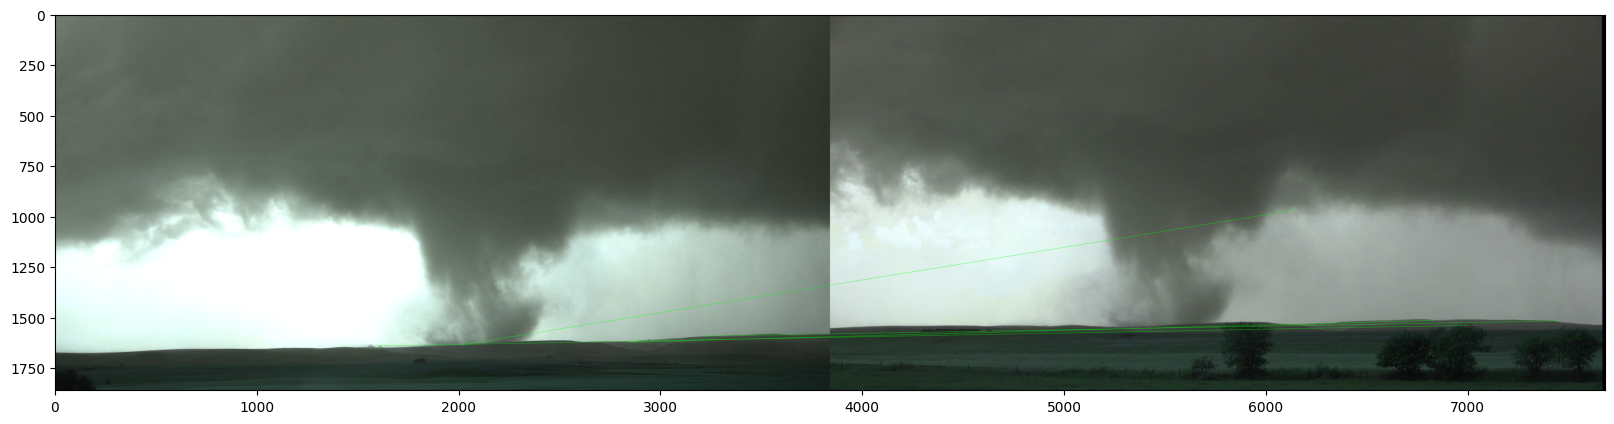

In [ ]:
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(des1, des2)
kp1 = [cv2.KeyPoint(x=kp[0], y=kp[1], size=kp[2], angle=kp[3], response=kp[4], octave=int(kp[5]), class_id=0) for kp in kp1_colmap]
kp2 = [cv2.KeyPoint(x=kp[0], y=kp[1], size=kp[2], angle=kp[3], response=kp[4], octave=int(kp[5]), class_id=0) for kp in kp2_colmap]

pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
pts1 = pts1[pts1[:, 0, 1] <= 1250]
pts2 = pts2[pts2[:, 0, 1] <= 1250]

H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, .99)
matchesMask = mask.ravel().tolist()
matchesMask.extend([0] * (len(matches) - len(matchesMask)))
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # draw only inliers
                   flags=2)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)
# img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)  

In [75]:
len(matches)

65

In [77]:
mask

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

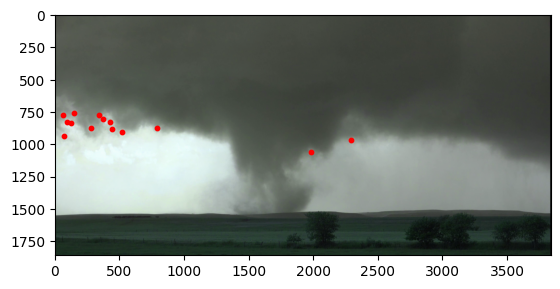

In [78]:
plt.imshow(img2) 
plt.scatter(pts2[:, 0, 0], pts2[:, 0, 1], c='r', s=10)

In [40]:
kp1_converted

<generator object <genexpr> at 0x000001C1319A18B0>

In [44]:
for image in os.listdir(os.path.join(src_pth, 'input')):
    img = cv2.imread(os.path.join(src_pth, 'input', image))
    img = img[0:-300]
    cv2.imwrite(os.path.join(src_pth, 'input', image), img)